# Day 3: Simplifying Neural Networks with `nn.Module` and `optim`

<h5>Goal of Day 3:</h5>

Understand how PyTorch simplifies model building, training, and optimization using:

* `nn.Module` (for defining model)

* `nn.Linear`, `nn.ReLU` (layers/activations)

* `optim.SGD` / `optim.Adam` (optimizers)

* `nn.MSELoss` / `nn.BCELoss` (loss functions)

<h4>Quick Recap of Day 2:</h4>
In Day 2, we did this manually:
<table>
<th>
Task</th><th>Implementation</th>
<tr>
<td>Forward Pass</td><td> 

`y_pred = X * w + b` </td>
<tr>
<td>Loss</td><td> 

`loss = ((y_pred - y)**2)`</td>
</tr>
<tr>
<td>Backward</td><td> 

`loss.backward() `</td>
</tr>
<tr>
<td>Weight Updates</td><td>

`w -= lr * w.grad`
</td>
</tr>
<tr>
<td>Reset gradients</td><td>

` w.grad.zero_() `</td>
</tr>
</table>


* PyTorch can do ALL of this for you with just a few lines using `nn` and `optim`.

### Step-by-Step: Linear Regression using `nn.Module`

##### Step 1: Import Libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


##### Step 2: Create Synthetic Data

In [3]:
true_w = 2.0
true_b = 3.0
N = 100

X = torch.randn(N, 1)
y = true_w * X + true_b + 0.1 * torch.randn(N, 1)

##### Step 3: Define the Model using nn.Module

In [4]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(1,1) #input size=1, output size=1
    def forward(self,x):
        return self.linear(x)

<b>What this does:</b>

* In `__init__`: You define your layers.

* In `forward`: You define how data flows (like Day 2's `X*w + b`).

* `nn.Linear` internally handles w and b with gradients tracked.

##### Step 4: Instantiate Model, Loss, and Optimizer

In [5]:
model=LinearRegressionModel()
loss_fn=nn.MSELoss() # Mean Square Error Loss
optimizer=optim.SGD(model.parameters(),lr=0.1) #Gradient Descent

#### What's happening:

* `model.parameters()` = gives all weights and biases in the model

* `optimizer.step()` = does the weight update

* `optimizer.zero_grad()` = resets the gradients for next epoch

##### Step 5: Training Loop

In [6]:
epochs=100 
losses=[]

for epoch in range(epochs):
    y_pred=model(X) #Forward Pass
    loss=loss_fn(y_pred,y) #Compute Loss
    
    optimizer.zero_grad() #zero gradients
    loss.backward() #Backward Pass
    optimizer.step() #Update weights
    losses.append(loss.item())
    if(epoch%10==0):
        print(f"Epoch {epoch} : Loss={loss.item():.4f}")
    

Epoch 0 : Loss=19.7527
Epoch 10 : Loss=0.4409
Epoch 20 : Loss=0.0199
Epoch 30 : Loss=0.0101
Epoch 40 : Loss=0.0099
Epoch 50 : Loss=0.0099
Epoch 60 : Loss=0.0099
Epoch 70 : Loss=0.0099
Epoch 80 : Loss=0.0099
Epoch 90 : Loss=0.0099


##### Step 6: Plotting the results

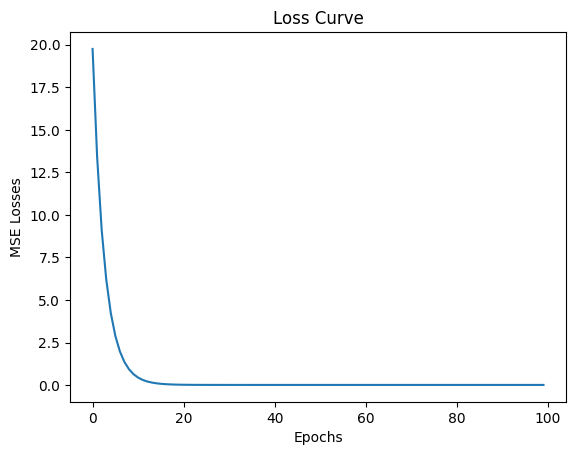

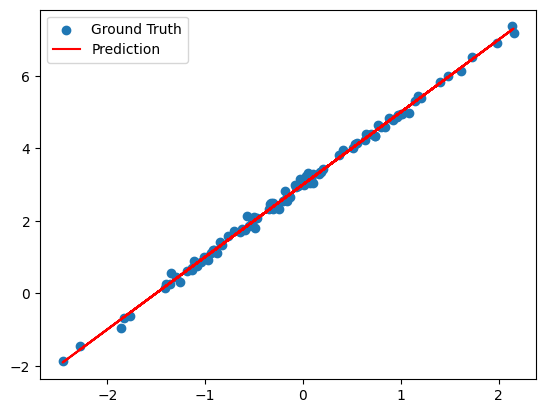

In [11]:
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Losses")
plt.show()

#plot learned line vs real data
plt.scatter(X.detach().numpy(),y.detach().numpy(),label="Ground Truth")
plt.plot(X.detach().numpy(),y_pred.detach().numpy(),color="Red",label="Prediction")
plt.legend()
plt.show()

#### What Did PyTorch Simplify?

| Component        | Day 2 (Manual)          | Day 3 (Simplified)              |
| ---------------- | ----------------------- | ------------------------------- |
| Model structure  | You wrote equations     | Use `nn.Linear`                 |
| Loss function    | Manual formula          | Use `nn.MSELoss()`              |
| Gradient calc    | `.backward()` manually  | Still same                      |
| Weight updates   | Manual `w -= lr * grad` | Use `optimizer.step()`          |
| Reset gradients  | `grad.zero_()`          | Use `optimizer.zero_grad()`     |
| Model parameters | Manual tensors          | `model.parameters()` handles it |


#### What is nn.Sequential?

`nn.Sequential` is a convenient wrapper in PyTorch that allows you to define a stack of layers in order, without writing a custom `forward()` function.

### Intuition:

* Imagine you’re building a network like this:

Input → Linear → ReLU → Linear → Output

Instead of writing this manually in `forward()`, you can just pass the layers to nn.Sequential in order.

#### Without nn.Sequential (Manual Definition):

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 20)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

You had to:

* Name each layer (`fc1`, `relu`, `fc2`)

* Manually chain them in `forward()`

#### With nn.Sequential (Shortcut Style):

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.model(x)


* <b>Advantages</b>: No need to write the `forward()` logic layer-by-layer — it’s already composed sequentially.

#### Comparison Table:

| Feature             | Manual (`nn.Module`)     | `nn.Sequential`                       |
| ------------------- | ------------------------ | ------------------------------------- |
| Control over layers | Full (can do branching)  | Limited (strictly sequential)         |
| Code verbosity      | More code                | Less code                             |
| Flexibility         | High (loops, conditions) | Low (just stack layers)               |
| Best use case       | Complex models           | Simple feedforward / CNN blocks       |
| Layer naming        | Named (`self.fc1`, etc.) | Indexed (like `model[0]`, `model[1]`) |


#### When to use `nn.Sequential`?

--> <b> Use when :</b>

* You have simple stack of layers (eg. Linear->ReLU->Linear->ReLU->Output)
* Also handy for CNN feature extraction:


In [15]:
#self.cnn=
cnn = nn.Sequential(
    nn.Conv2d(1, 16, 3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2)
)


* Avoid when:

`You need conditional logic, skip connections, branching, etc.`